In [ ]:
#选股

In [ ]:
import os
import pandas as pd

# 读取 Excel 文件
file_path = r"数据\\筛选因子.xlsx"
data = pd.read_excel(file_path)

# 数据类型转换：确保数值列为数值类型
data['公司市值'] = pd.to_numeric(data['公司市值'], errors='coerce')
data['增长率'] = pd.to_numeric(data['增长率'], errors='coerce')
data['波动性'] = pd.to_numeric(data['波动性'], errors='coerce')
data['股息率'] = pd.to_numeric(data['股息率'], errors='coerce')

# 检查并输出缺失因子列的信息
missing_factors_summary = data[['公司市值', '增长率', '波动性', '股息率']].isnull().sum()
if missing_factors_summary.any():
    print("数据中存在缺失值，具体缺失情况如下：")
    for factor, count in missing_factors_summary.items():
        if count > 0:
            print(f"{factor}: 缺失 {count} 条记录")
    
    # 删除含有缺失因子的记录
    data = data.dropna(subset=['公司市值', '增长率', '波动性', '股息率'])
    print("缺失因子的记录已被删除。")
else:
    print("数据中没有缺失值。")

# 定义策略函数
def select_stocks(data, year, strategy_num):
    yearly_data = data[data['年份'] == year]
    
    
    if strategy_num == 1:
       selected = yearly_data.nsmallest(len(yearly_data) // 2, '公司市值')
    elif strategy_num == 2:
       selected = yearly_data.nlargest(len(yearly_data) // 2, '公司市值')
    elif strategy_num == 3:
       selected = yearly_data.nsmallest(int(len(yearly_data) * 0.2), '波动性')
    elif strategy_num == 4:
       selected = yearly_data.nlargest(int(len(yearly_data) * 0.2), '波动性')
    elif strategy_num == 5:
       temp = yearly_data.nsmallest(int(len(yearly_data) * 0.2), '波动性')
       selected = temp.nsmallest(len(temp) // 2, '公司市值')
    elif strategy_num == 6:
       temp = yearly_data.nsmallest(int(len(yearly_data) * 0.2), '波动性')
       selected = temp.nlargest(len(temp) // 2, '公司市值')
    elif strategy_num == 7:
       temp = yearly_data.nlargest(int(len(yearly_data) * 0.2), '波动性')
       selected = temp.nsmallest(len(temp) // 2, '公司市值')
    elif strategy_num == 8:
       temp = yearly_data.nlargest(int(len(yearly_data) * 0.2), '波动性')
       selected = temp.nlargest(len(temp) // 2, '公司市值')
    elif strategy_num == 9:
       temp = yearly_data.nsmallest(int(len(yearly_data) * 0.2), '波动性')
       temp = temp.nlargest(int(len(temp) * 0.2), '增长率')
       selected = temp.nsmallest(len(temp) // 2, '公司市值')
    elif strategy_num == 10:
       temp = yearly_data.nsmallest(int(len(yearly_data) * 0.2), '波动性')
       temp = temp.nlargest(int(len(temp) * 0.2), '增长率')
       selected = temp.nlargest(len(temp) // 2, '公司市值')
    elif strategy_num == 11:
       temp = yearly_data.nlargest(int(len(yearly_data) * 0.2), '波动性')
       temp = temp.nlargest(int(len(temp) * 0.2), '增长率')
       selected = temp.nsmallest(len(temp) // 2, '公司市值')
    elif strategy_num == 12:
       temp = yearly_data.nlargest(int(len(yearly_data) * 0.2), '波动性')
       temp = temp.nlargest(int(len(temp) * 0.2), '增长率')
       selected = temp.nlargest(len(temp) // 2, '公司市值') 
    elif strategy_num == 13:
       temp = yearly_data.nsmallest(len(yearly_data) // 2, '公司市值')
       temp = temp.nsmallest(int(len(temp) * 0.2), '波动性')
       selected = temp.nlargest(int(len(temp) * 0.2), '增长率')
    elif strategy_num == 14:
       temp = yearly_data.nsmallest(len(yearly_data) // 2, '公司市值')
       temp = temp.nlargest(int(len(temp) * 0.2), '增长率')
       selected = temp.nsmallest(int(len(temp) * 0.2), '波动性')
    elif strategy_num == 15:
       temp = yearly_data.nsmallest(int(len(yearly_data) * 0.2), '波动性')
       temp = temp.nlargest(int(len(temp) * 0.2), '股息率')
       selected = temp.nsmallest(len(temp) // 2, '公司市值')
    elif strategy_num == 16:
       temp = yearly_data.nsmallest(int(len(yearly_data) * 0.2), '波动性')
       temp = temp.nlargest(int(len(temp) * 0.2), '股息率')
       selected = temp.nlargest(len(temp) // 2, '公司市值')
    elif strategy_num == 17:
       temp = yearly_data.nlargest(int(len(yearly_data) * 0.2), '波动性')
       temp = temp.nlargest(int(len(temp) * 0.2), '股息率')
       selected = temp.nsmallest(len(temp) // 2, '公司市值')
    elif strategy_num == 18:
       temp = yearly_data.nlargest(int(len(yearly_data) * 0.2), '波动性')
       temp = temp.nlargest(int(len(temp) * 0.2), '股息率')
       selected = temp.nlargest(len(temp) // 2, '公司市值')
    elif strategy_num == 19:
       temp = yearly_data.nsmallest(len(yearly_data) // 2, '公司市值')
       temp = temp.nsmallest(int(len(temp) * 0.2), '波动性')
       selected = temp.nlargest(int(len(temp) * 0.2), '股息率')
    elif strategy_num == 20:
       temp = yearly_data.nsmallest(len(yearly_data) // 2, '公司市值')
       temp = temp.nlargest(int(len(temp) * 0.2), '股息率')
       selected = temp.nsmallest(int(len(temp) * 0.2), '波动性')

      
                 
    else:
        selected = pd.DataFrame()  # 若策略号不匹配，则返回空数据框

    return selected[['证券代码', '证券名称', '年份']]

# 筛选每年和每种策略下的股票代码
years = data['年份'].unique()
strategy_count = 20

# 创建文件夹并保存
output_dir = r"数据\\策略选股"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for strategy_num in range(1, strategy_count + 1):
    strategy_folder = os.path.join(output_dir, f"{strategy_num}")
    if not os.path.exists(strategy_folder):
        os.makedirs(strategy_folder)

    # 创建ExcelWriter对象
    output_path = os.path.join(strategy_folder, f"策略{strategy_num}.xlsx")
    with pd.ExcelWriter(output_path) as writer:
        for year in years:
            selected_stocks = select_stocks(data, year, strategy_num)
            selected_stocks.to_excel(writer, sheet_name=str(year), index=False)
    
    print(f"策略 {strategy_num} 的所有年份股票代码已保存至 {output_path}")


In [ ]:
#股价整合

In [3]:
import pandas as pd
import os
from tqdm import tqdm
import concurrent.futures

# 设置文件路径
price_data_dir = r'数据\个股日收盘价'
temp_output_dir = r'数据\临时股价数据'

# 创建临时输出目录
if not os.path.exists(temp_output_dir):
    os.makedirs(temp_output_dir)

# 获取所有股价文件的列表
price_files = [os.path.join(price_data_dir, f) for f in os.listdir(price_data_dir) if f.endswith('.xlsx')]

# 初始化字典存储所有股票数据和交易日
all_stock_data = {}
all_dates = set()

# 读取单个文件并提取信息的函数
def process_file(file):
    df = pd.read_excel(file)
    return df

# 并行读取所有文件
dfs = []
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_file, file) for file in price_files]
    for future in tqdm(concurrent.futures.as_completed(futures), total=len(price_files), desc="读取股价文件"):
        dfs.append(future.result())

# 合并所有读取的数据
all_data = pd.concat(dfs)

# 提取所有交易日期和股票代码
all_dates = sorted(all_data['交易日期'].unique())
stock_codes = all_data['证券代码'].unique()

# 创建包含所有股票和交易日的DataFrame
columns = ['证券代码'] + all_dates
result_df = pd.DataFrame(columns=columns)
result_df['证券代码'] = stock_codes

# 将日期作为列索引
date_dict = {date: i + 1 for i, date in enumerate(all_dates)}

# 填充DataFrame
for stock_code in tqdm(stock_codes, desc="填充数据"):
    stock_data = all_data[all_data['证券代码'] == stock_code]
    row = [''] * len(columns)
    row[0] = stock_code
    for _, data in stock_data.iterrows():
        row[date_dict[data['交易日期']]] = data['日收盘价']
    result_df.loc[result_df['证券代码'] == stock_code] = row

# 保存分块文件
chunk_size = 50
num_chunks = (len(result_df) + chunk_size - 1) // chunk_size

for chunk_idx in range(num_chunks):
    chunk_df = result_df.iloc[chunk_idx * chunk_size : (chunk_idx + 1) * chunk_size]
    chunk_output_file = os.path.join(temp_output_dir, f"临时股价数据_块{chunk_idx + 1}.xlsx")
    chunk_df.to_excel(chunk_output_file, index=False)
    print(f"数据块 {chunk_idx + 1} 已成功保存到 {chunk_output_file}")

print("所有分块数据已成功保 存到临时目录。")


填充数据:  31%|███▏      | 1778/5660 [14:42<32:07,  2.01it/s]  


KeyboardInterrupt: 

In [ ]:
# 策略价格补充

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
from multiprocessing import Pool, cpu_count, Manager


def load_stock_data(stock_data_files):
    stock_data_dict = {}
    for stock_data_file in stock_data_files:
        stock_data_df = pd.read_excel(stock_data_file)
        stock_data_df['证券代码'] = stock_data_df['证券代码'].astype(str)
        for _, row in stock_data_df.iterrows():
            stock_code = row['证券代码']
            if stock_code not in stock_data_dict:
                stock_data_dict[stock_code] = {}
            for col in stock_data_df.columns[1:]:
                date = col
                if date not in stock_data_dict[stock_code]:
                    stock_data_dict[stock_code][date] = row[col]
    return stock_data_dict


def filter_stock_data_for_year(stock_data_dict, target_year):
    filtered_stock_data_dict = {}
    for stock_code, data in stock_data_dict.items():
        filtered_data = {date: price for date, price in data.items() if str(target_year) in str(date)}
        if filtered_data:
            filtered_stock_data_dict[stock_code] = filtered_data
    return filtered_stock_data_dict


def process_sheet(strategy_file, sheet, stock_data_dict, output_folder, progress_queue):
    assert isinstance(stock_data_dict, dict), "stock_data_dict should be a dictionary"

    strategy_df = pd.read_excel(strategy_file, sheet_name=sheet)
    strategy_df['证券代码'] = strategy_df['证券代码'].astype(str)

    target_year = strategy_df['年份'].iloc[0]  # 假设所有行的年份相同

    stock_codes = strategy_df['证券代码'].unique()
    filtered_stock_data_dict = filter_stock_data_for_year(stock_data_dict, target_year)

    updated_strategy_df = strategy_df.copy()
    all_new_columns = set()

    for stock_code in stock_codes:
        if stock_code in filtered_stock_data_dict:
            all_new_columns.update(filtered_stock_data_dict[stock_code].keys())

    for col in sorted(all_new_columns):
        if col not in updated_strategy_df.columns:
            updated_strategy_df[col] = pd.NA

    for index, row in updated_strategy_df.iterrows():
        stock_code = row['证券代码']
        if stock_code in filtered_stock_data_dict:
            for date, price in filtered_stock_data_dict[stock_code].items():
                updated_strategy_df.at[index, date] = price if price else pd.NA

        progress_queue.put(1)

    output_file_path = os.path.join(output_folder,
                                    f'updated_{os.path.basename(strategy_file).replace(".xlsx", "")}_{sheet}.xlsx')
    updated_strategy_df.to_excel(output_file_path, index=False)


def process_file(strategy_file, stock_data_dict, output_folder, progress_queue):
    xls = pd.ExcelFile(strategy_file)
    sheet_names = xls.sheet_names

    args = [(strategy_file, sheet, stock_data_dict, output_folder, progress_queue) for sheet in sheet_names]

    total_tasks = sum([len(pd.read_excel(strategy_file, sheet_name=sheet)) for sheet in sheet_names])

    with Pool(cpu_count() // 2) as pool:
        result = pool.starmap_async(process_sheet, args)

        # 显示进度条
        with tqdm(total=total_tasks, desc=f'Processing {os.path.basename(strategy_file)}') as pbar:
            while not result.ready() or not progress_queue.empty():
                try:
                    progress_queue.get(timeout=1)
                    pbar.update(1)
                except:
                    pass
        result.get()


if __name__ == "__main__":
    strategy_folders = [
    r'数据\策略选股\1',
    r'数据\策略选股\2',    
    r'数据\策略选股\3',
    r'数据\策略选股\4',
    r'数据\策略选股\5',
    r'数据\策略选股\6',
    r'数据\策略选股\7',
    r'数据\策略选股\8',
    r'数据\策略选股\9',
    r'数据\策略选股\10',
    r'数据\策略选股\11',
    r'数据\策略选股\12',
    r'数据\策略选股\13',
    r'数据\策略选股\14',
    r'数据\策略选股\15',
    r'数据\策略选股\16',
    r'数据\策略选股\17',
    r'数据\策略选股\18',
    r'数据\策略选股\19',
    r'数据\策略选股\20' 
    ]
    stock_data_folder = r"数据\临时股价数据"
    output_folder = r"数据\选股策略股价"   

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    stock_data_files = [os.path.join(stock_data_folder, f) for f in os.listdir(stock_data_folder) if
                        f.endswith('.xlsx')]

    # 只加载一次股价数据
    stock_data_dict = load_stock_data(stock_data_files)
    print(f"Loaded stock data of type: {type(stock_data_dict)}")  # 确认数据类型

    manager = Manager()
    progress_queue = manager.Queue()

    # 遍历所有策略文件夹中的策略文件
    for strategy_folder in strategy_folders:
        strategy_files = [os.path.join(strategy_folder, f) for f in os.listdir(strategy_folder) if f.endswith('.xlsx')]
        args = [(strategy_file, stock_data_dict, output_folder, progress_queue) for strategy_file in strategy_files]

        for arg in tqdm(args, desc=f"Processing strategy files in {strategy_folder}"):
            process_file(*arg)


In [1]:
import pandas as pd
import os
import re

def calculate_daily_returns_for_folder(input_dir, output_dir):
    # 确保输出目录存在
    os.makedirs(output_dir, exist_ok=True)

    # 遍历输入目录中的所有文件
    for filename in os.listdir(input_dir):
        if filename.endswith('.xlsx'):
            file_path = os.path.join(input_dir, filename)
            output_file_path = os.path.join(output_dir, f"returns_{filename}")

            # 从文件名提取策略名称（假设格式为 "updated_策略20_2013.xlsx"）
            strategy_name_match = re.search(r'策略\d+', filename)
            strategy_name = strategy_name_match.group(0) if strategy_name_match else '未知策略'

            # 处理每个 Excel 文件
            try:
                excel_data = pd.ExcelFile(file_path)
                for sheet in excel_data.sheet_names:
                    df = excel_data.parse(sheet)

                    # 对日期列排序（假设日期列在第6列及以后）
                    sorted_columns = df.columns[3:].sort_values()
                    df = df.iloc[:, :3].join(df.loc[:, sorted_columns])

                    # 计算每日收益率
                    returns_df = df.iloc[:, 3:].pct_change(axis=1)

                    # 将策略名称添加为新列
                    returns_df.insert(0, '策略', strategy_name)

                    # 将元数据列添加回数据框
                    returns_df = pd.concat([df.iloc[:, :3], returns_df], axis=1)

                    # 将结果数据框保存到新的 Excel 文件
                    returns_df.to_excel(output_file_path, index=False)

                print(f"每日收益率已计算并保存至: {output_file_path}")

            except Exception as e:
                print(f"处理 {file_path} 时出错: {e}")

# 示例用法:
input_dir = r"数据\选股策略股价" # 修改为你的文件夹路径
output_dir = r"数据\output" # 修改为你希望保存结果文件的目录路径

calculate_daily_returns_for_folder(input_dir, output_dir)


每日收益率已计算并保存至: 数据\output\returns_updated_策略10_2013.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略10_2014.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略10_2015.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略10_2016.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略10_2017.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略10_2018.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略10_2019.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略10_2020.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略10_2021.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略10_2022.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略10_2023.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略11_2013.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略11_2014.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略11_2015.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略11_2016.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略11_2017.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略11_2018.xlsx
每日收益率已计算并保存至: 数据\output\returns_updated_策略11_2019.xlsx
每日收益率已计算并保

In [ ]:
# 策略收益率

In [9]:
import pandas as pd
import os
from tqdm import tqdm


def calculate_mean_returns(folder_path, output_file_path):
    # Initialize an empty list to store the dataframes
    dfs = []

    # Iterate over all Excel files in the specified folder with a progress bar
    for file_name in tqdm(os.listdir(folder_path), desc="Processing files"):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_excel(file_path, sheet_name='Sheet1')
            dfs.append(df)

    # Combine all dataframes
    combined_df = pd.concat(dfs)

    # Extract the year and strategy
    combined_df['年份'] = combined_df['年份'].astype(str)
    combined_df['策略'] = combined_df['策略'].astype(str)

    # Calculate daily mean returns for each strategy
    mean_returns = combined_df.groupby('策略').mean(numeric_only=True)

    # Reset index for easier manipulation
    mean_returns.reset_index(inplace=True)

    # Sort columns in chronological order
    date_columns = sorted(
        [col for col in mean_returns.columns if col not in ['策略', '证券代码', '证券名称', '年份', '行业名称']])
    mean_returns = mean_returns[['策略'] + date_columns]

    # Save the resulting DataFrame to an Excel file
    mean_returns.to_excel(output_file_path, index=False, engine='openpyxl')
    print(f"Mean returns have been saved to {output_file_path}")


# Specify the folder path containing the Excel files
folder_path = r"数据\output"
# Specify the output file path with the .xlsx extension
output_file_path = r'数据\策略收益率.xlsx'

calculate_mean_returns(folder_path, output_file_path)


Processing files: 100%|██████████| 220/220 [01:54<00:00,  1.92it/s]


Mean returns have been saved to 数据\策略收益率.xlsx


In [ ]:
# 价值序列

In [14]:
import pandas as pd

# 加载Excel文件
file_path = r"数据\策略收益率.xlsx"
df = pd.read_excel(file_path)

# 删除全为NaN的列
df_cleaned = df.dropna(axis=1, how='all')

# 初始价值设为1
initial_value = 1

# 计算价值序列的函数
def calculate_value_sequence(returns):
    value_sequence = [initial_value]
    for r in returns:
        value_sequence.append(value_sequence[-1] * (1 + r))
    return value_sequence[1:]

# 创建字典保存各策略的价值序列
values = {}
for index, row in df_cleaned.iterrows():
    strategy_name = row['策略']
    returns = row[1:].dropna().values  # 跳过策略列
    values[strategy_name] = calculate_value_sequence(returns)

# 转换为DataFrame并保留策略列名
values_df = pd.DataFrame.from_dict(values, orient='index').reset_index()
values_df = values_df.rename(columns={'index': '策略'})

# 设置列名（策略 + 日期）
dates = df_cleaned.columns[1:]
values_df.columns = ['策略'] + dates.tolist()

# 保存到Excel
output_file_path = r'数据\策略价值序列.xlsx'
values_df.to_excel(output_file_path, index=False, header=True)

print("价值序列已保存至:", output_file_path)

价值序列已保存至: 数据\策略价值序列.xlsx


In [15]:
import pandas as pd

# 读取 Excel 文件
file_path = r'数据\策略价值序列.xlsx'
data = pd.read_excel(file_path)

# 使用 melt 函数将数据从宽格式转换为长格式
long_format_data = pd.melt(data, id_vars=['策略'], 
                           var_name='日期', value_name='收益率')

# 保存长格式的数据到新的 Excel 文件
output_file_path = r'数据\策略价值序列_长格式.xlsx'
long_format_data.to_excel(output_file_path, index=False)

print("长格式的数据已保存至：", output_file_path)


长格式的数据已保存至： 数据\策略价值序列_长格式.xlsx


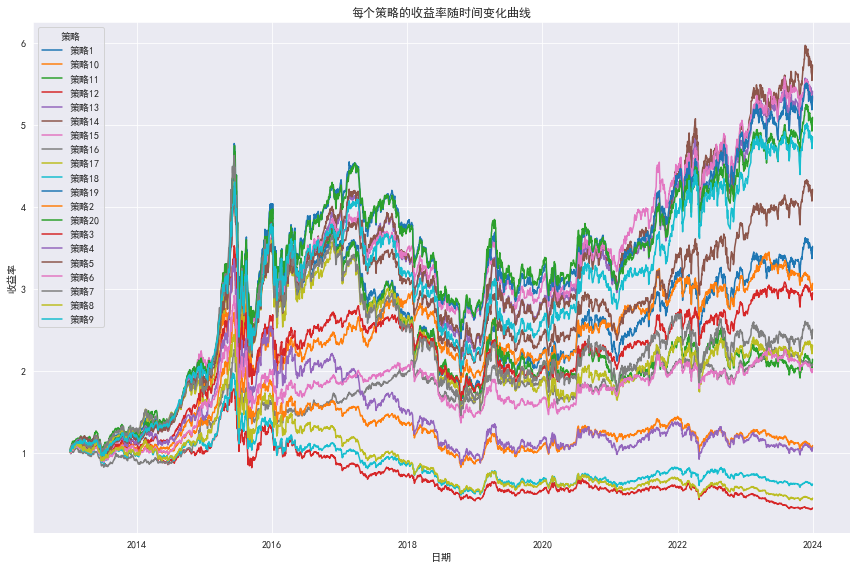

时间序列曲线图已保存至： 数据\策略收益率时间序列曲线.png


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Excel 文件
file_path = r'数据\策略价值序列_长格式.xlsx'
data = pd.read_excel(file_path)

# 确保日期为日期格式
data['日期'] = pd.to_datetime(data['日期'])

# 创建绘图
plt.figure(figsize=(12, 8))
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统下可以使用SimHei字体

# 获取唯一策略
strategies = data['策略'].unique()

for strategy in strategies:
    # 筛选该策略的数据
    strategy_data = data[data['策略'] == strategy]
    
    # 按日期排序
    strategy_data = strategy_data.sort_values('日期')
    
    # 绘制收益率随时间的变化
    plt.plot(strategy_data['日期'], strategy_data['收益率'], marker='', linestyle='-', label=strategy)

# 添加图例、标题和标签
plt.legend(title='策略')
plt.title('每个策略的收益率随时间变化曲线')
plt.xlabel('日期')
plt.ylabel('收益率')
plt.grid(True)
plt.tight_layout()

# 保存图形
output_file_path = r'数据\策略收益率时间序列曲线.png'
plt.savefig(output_file_path)

# 显示图形
plt.show()

print("时间序列曲线图已保存至：", output_file_path)

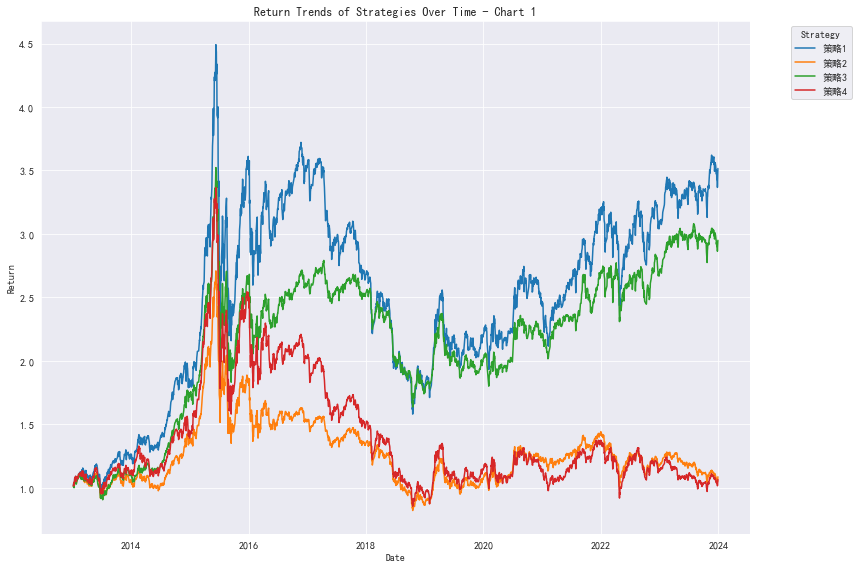

Time series curve chart 1 has been saved to: 数据\策略收益率时间序列曲线_1.png


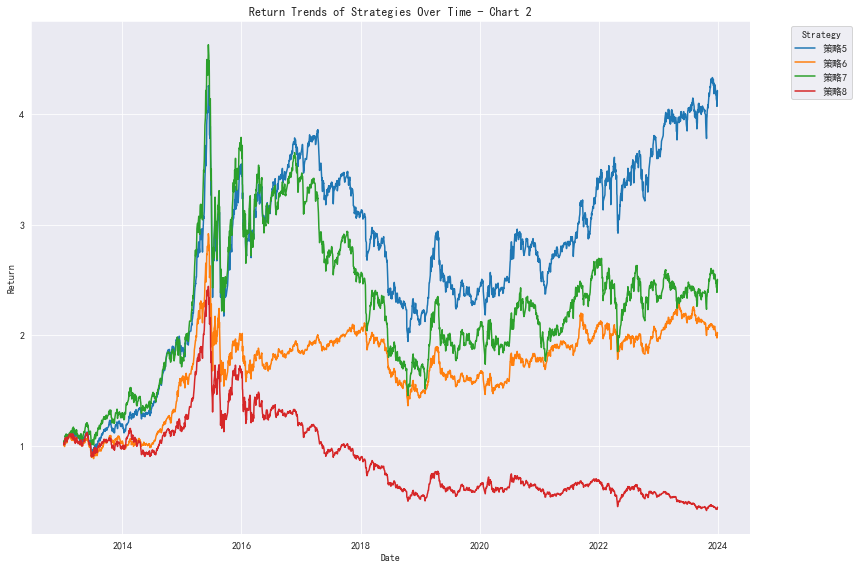

Time series curve chart 2 has been saved to: 数据\策略收益率时间序列曲线_2.png


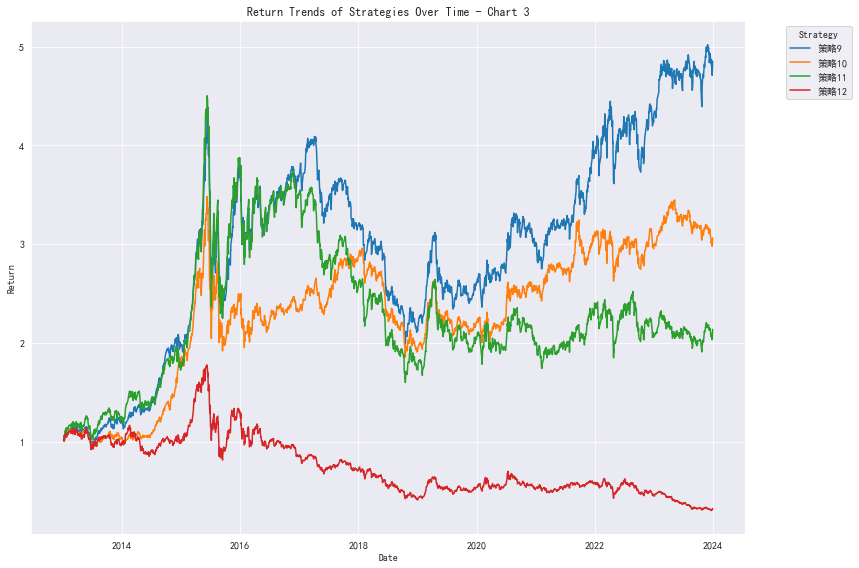

Time series curve chart 3 has been saved to: 数据\策略收益率时间序列曲线_3.png


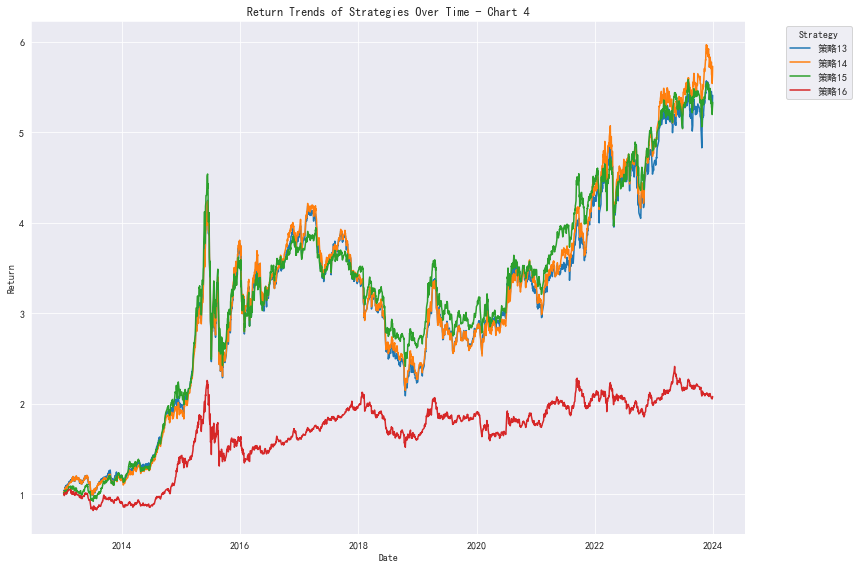

Time series curve chart 4 has been saved to: 数据\策略收益率时间序列曲线_4.png


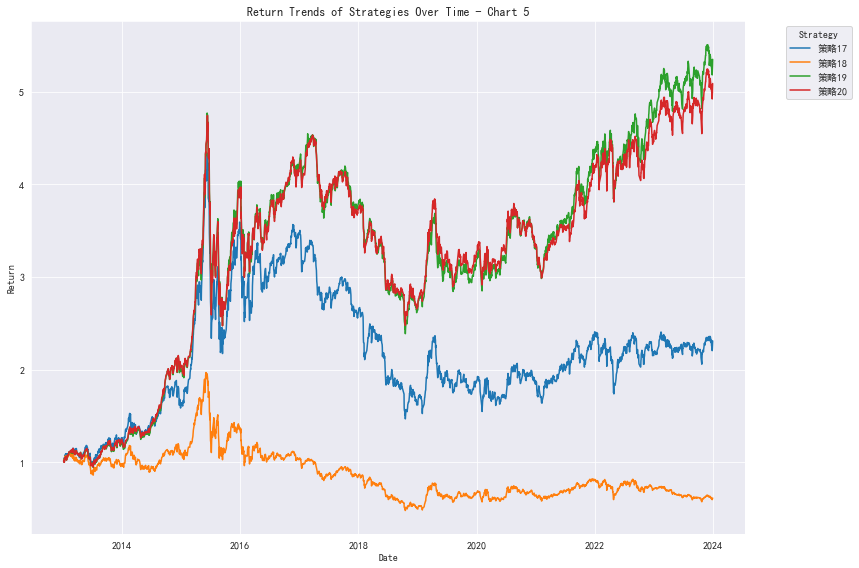

Time series curve chart 5 has been saved to: 数据\策略收益率时间序列曲线_5.png


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Excel 文件
file_path = r'数据\策略价值序列_长格式.xlsx'
data = pd.read_excel(file_path)

# 重命名列
data.rename(columns={'策略': 'Strategy'}, inplace=True)

# 确保日期为日期格式
data['日期'] = pd.to_datetime(data['日期'])

# 获取唯一策略并排序
strategies = sorted(data['Strategy'].unique(), key=lambda x: int(x.split('策略')[-1]))

# 策略分组
grouped_strategies = [strategies[i:i + 4] for i in range(0, len(strategies), 4)]

# 创建多个子图
for i, group in enumerate(grouped_strategies):
    plt.figure(figsize=(12, 8))
    plt.rcParams['axes.unicode_minus'] = False 
    plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统下可以使用SimHei字体  

    for strategy in group:
        # 筛选该策略的数据
        strategy_data = data[data['Strategy'] == strategy]
        
        # 按日期排序
        strategy_data = strategy_data.sort_values('日期')
        
        # 绘制收益率随时间的变化
        plt.plot(strategy_data['日期'], strategy_data['收益率'], marker='', linestyle='-', label=strategy)
    
    # 添加图例、标题和标签
    plt.legend(title='Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Return Trends of Strategies Over Time - Chart {i + 1}')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.grid(True)
    plt.tight_layout()
    
    # 保存图形
    output_file_path = f'数据\\策略收益率时间序列曲线_{i + 1}.png'
    plt.savefig(output_file_path)
    
    # 显示图形
    plt.show()

    print(f"Time series curve chart {i + 1} has been saved to:", output_file_path)